In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amxn18","key":"f1e1b131a8ef9745223ab01525debf12"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!pip install -q kaggle


In [5]:
!pip install -q kaggle
!kaggle datasets download -d tongpython/cat-and-dog
!unzip -q cat-and-dog.zip -d ./dogs-vs-cats



Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 57% 125M/218M [00:00<00:00, 1.31GB/s]
100% 218M/218M [00:00<00:00, 828MB/s] 


In [6]:
!unzip -q /content/cat-and-dog.zip -d /content/dogs-vs-cats


replace /content/dogs-vs-cats/test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
# Data Augmentation Pass Through Training Dataset
trainingSet = trainDatagen.flow_from_directory(
    '/content/dogs-vs-cats/training_set/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.


In [12]:
# Training Data
trainingSet = trainDatagen.flow_from_directory(
    '/content/dogs-vs-cats/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

# Test Data
testSet = testDatagen.flow_from_directory(
    '/content/dogs-vs-cats/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


In [13]:
import os
os.listdir('/content/dogs-vs-cats/training_set')


['training_set']

In [14]:
!mv /content/dogs-vs-cats/training_set/training_set/* /content/dogs-vs-cats/training_set/
!mv /content/dogs-vs-cats/test_set/test_set/* /content/dogs-vs-cats/test_set/


In [15]:
import os
os.listdir('/content/dogs-vs-cats/training_set')


['training_set', 'cats', 'dogs']

In [16]:
trainingSet = trainDatagen.flow_from_directory(
    '/content/dogs-vs-cats/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

testSet = testDatagen.flow_from_directory(
    '/content/dogs-vs-cats/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 3 classes.
Found 2023 images belonging to 3 classes.


In [20]:
!rm -r /content/dogs-vs-cats/training_set/training_set



rm: cannot remove '/content/dogs-vs-cats/training_set/training_set': No such file or directory


# All the dataset cleaning  is done above ignore it



In [53]:
# Data Preprocessing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainDatagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

testDatagen = ImageDataGenerator(rescale=1./255)

trainingSet = trainDatagen.flow_from_directory(
    '/content/dogs-vs-cats/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

testSet = testDatagen.flow_from_directory(
    '/content/dogs-vs-cats/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [54]:
# Cell 2: Custom generator wrapper to convert labels 0/1 to -1/+1
def hinge_label_generator(generator):
    while True:
        x_batch, y_batch = next(generator)
        y_batch = y_batch * 2 - 1  # Convert 0->-1, 1->+1
        yield x_batch, y_batch


In [59]:
# Cell 3: Build the CNN model with linear output (SVM style)
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.models import Sequential
import tensorflow.keras.regularizers as regularizers

cnn = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(32, kernel_size=3, strides=2, activation='relu', padding='same'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, kernel_regularizer=regularizers.l2(0.001), activation='linear')
])

cnn.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,937 (296.63 KB)

 Trainable params: 75,937 (296.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# For Multiclass Classifiation
cnn.add(Dense(4, kernel_regulazier = tf.keras.regulaziers.l2(0.01), activation = 'softmax'))
cnn.compilr(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [60]:
# Compile and train with hinge loss and label converted generators
train_generator = hinge_label_generator(trainingSet)
test_generator = hinge_label_generator(testSet)

cnn.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])

cnn.fit(
    train_generator,
    validation_data=test_generator,
    steps_per_epoch=len(trainingSet),
    validation_steps=len(testSet),
    epochs=15
)


Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 100ms/step - accuracy: 0.0564 - loss: 0.9762 - val_accuracy: 0.2531 - val_loss: 0.7825
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 161ms/step - accuracy: 0.2075 - loss: 0.7861 - val_accuracy: 0.4236 - val_loss: 0.8524
Epoch 3/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.2424 - loss: 0.7641 - val_accuracy: 0.2773 - val_loss: 0.6564
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.2613 - loss: 0.6650 - val_accuracy: 0.3435 - val_loss: 0.6573
Epoch 5/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - accuracy: 0.2514 - loss: 0.6417 - val_accuracy: 0.3366 - val_loss: 0.6280
Epoch 6/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.2948 - loss: 0.6048 - val_accuracy: 0.4320 - val_loss: 0.7691
Epoch 7/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 159ms/step - accuracy: 0.3026 - loss: 0.5999 - val_accuracy: 0.3134 - val_loss: 0.5657
Epoch 8/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step - accuracy: 0.2990 - loss: 0.5

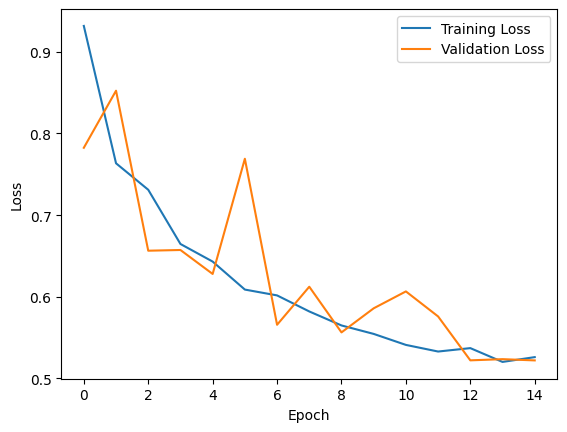

In [61]:
# Plotting the loss
import matplotlib.pyplot as plt

plt.plot(cnn.history.history['loss'], label='Training Loss')
plt.plot(cnn.history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

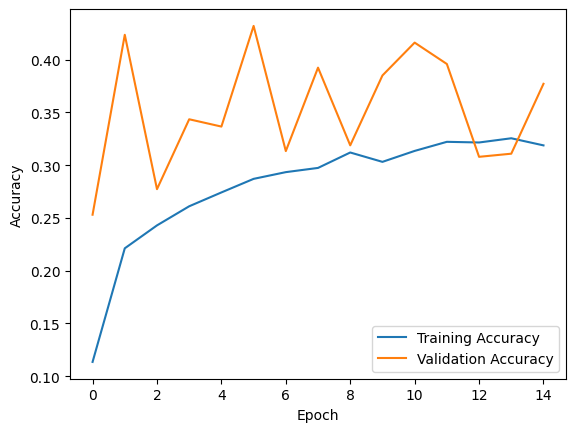

In [62]:
# Plotting accuracy
plt.plot(cnn.history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [64]:
# Save the Model
from tensorflow.keras.models import load_model
cnn.save('dogsvscats.h5')

In [66]:
model = load_model('dogsvscats.h5')
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,939 (296.64 KB)

 Trainable params: 75,937 (296.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [71]:
# Predictions
import numpy as np
from tensorflow.keras.preprocessing import image
testImage = image.load_img('/content/dogs-vs-cats/test_set/dogs/dog.4005.jpg', target_size= (64,64,3))
testImage = image.img_to_array(testImage)
testImage = testImage/255
testImage = np.expand_dims(testImage, axis = 0)
result = cnn.predict(testImage)
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
dog


In [72]:
import numpy as np
from tensorflow.keras.preprocessing import image
testImage = image.load_img('/content/dogs-vs-cats/test_set/cats/cat.4039.jpg', target_size= (64,64,3))
testImage = image.img_to_array(testImage)
testImage = testImage/255
testImage = np.expand_dims(testImage, axis = 0)
result = cnn.predict(testImage)
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
cat
